In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
df = pd.read_csv('heart.csv')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
#isolate discrete and categorical data
# make a list of the numerical variables first
numerical = [var for var in df.columns if df[var].dtype!='O']
numerical

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [7]:
#isolate numerical discrete into a list named numerical_discrete
discrete = []

for var in numerical:
    if len(df[var].unique())<20 :
        print(var, ' values: ', df[var].unique())
        discrete.append(var)
print()
print('There are {} discrete variables'.format(len(discrete)))

#Numerical_discrete column  list
discrete


sex  values:  [1 0]
cp  values:  [3 2 1 0]
fbs  values:  [1 0]
restecg  values:  [0 1 2]
exang  values:  [0 1]
slope  values:  [0 2 1]
ca  values:  [0 2 1 3 4]
thal  values:  [1 2 3 0]
target  values:  [1 0]

There are 9 discrete variables


['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [8]:
# isolate numerical continous into a list named continuous

continuous = [var for var in numerical if var not in discrete]
#column list continuous discrete
continuous

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

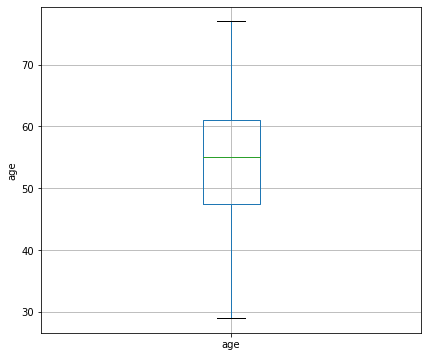

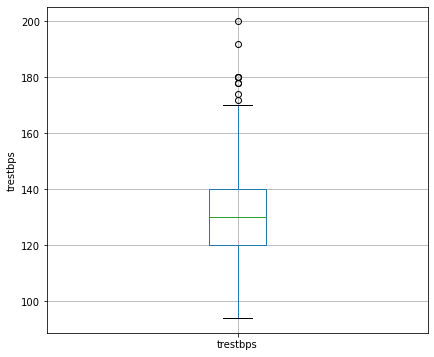

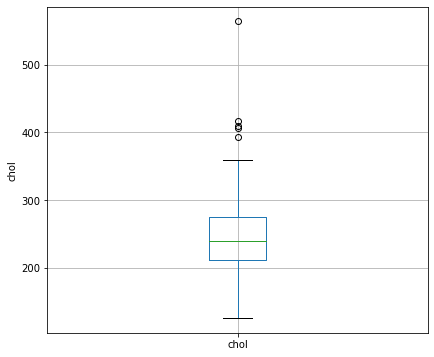

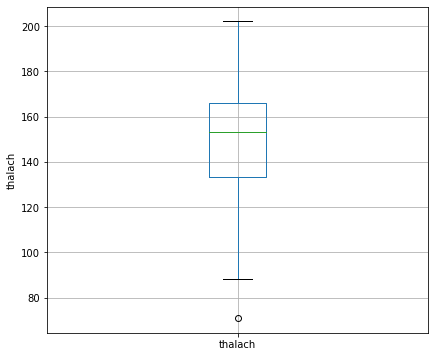

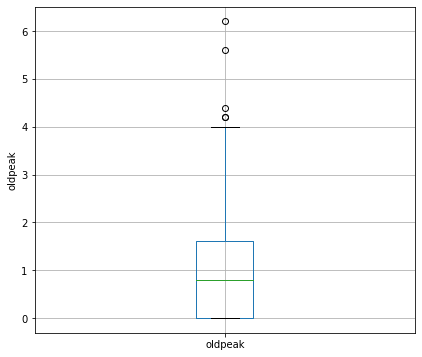

In [9]:
# let's make boxplots to visualise outliers in the continuous variables 

for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = df.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)

In [10]:
df_continuous= df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

In [11]:
df.shape

(303, 14)

<AxesSubplot:xlabel='trestbps'>

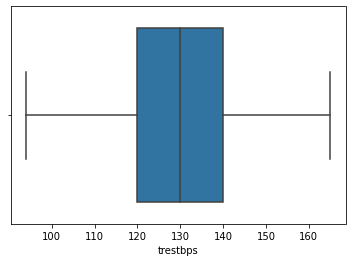

In [12]:
#remove outliers: 'tretbps'


def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(df.trestbps)


df = df.loc[(df.trestbps > lower) & (df.trestbps < upper)]


sns.boxplot(df.trestbps)

<AxesSubplot:xlabel='chol'>

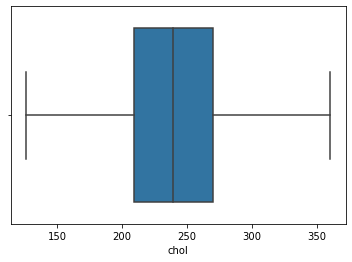

In [13]:
#remove outliers: 'chol'
lower, upper = remove_outlier(df.chol)


df = df.loc[(df.chol > lower) & (df.chol < upper)]

sns.boxplot(df.chol)

<AxesSubplot:xlabel='thalach'>

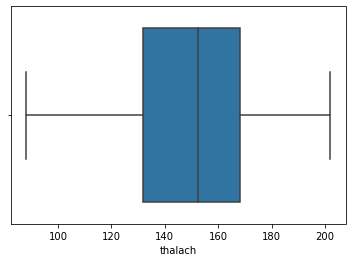

In [14]:
#remove outliers: 'thalach'
lower, upper = remove_outlier(df.thalach)


df = df.loc[(df.thalach > lower) & (df.thalach < upper)]

sns.boxplot(df.thalach)

<AxesSubplot:xlabel='oldpeak'>

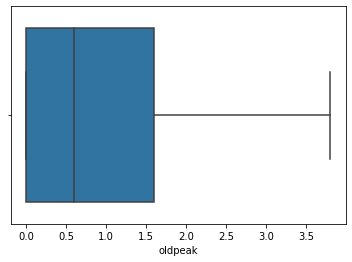

In [15]:
#remove outliers: 'thalach'
lower, upper = remove_outlier(df.oldpeak)


df = df.loc[(df.oldpeak > lower) & (df.oldpeak < upper)]

sns.boxplot(df.oldpeak)

In [16]:
df.shape

(279, 14)

In [17]:
pd.cut(df['age'], bins=4).value_counts()

(53.0, 65.0]      124
(41.0, 53.0]       97
(65.0, 77.0]       29
(28.952, 41.0]     29
Name: age, dtype: int64

In [18]:
pd.cut(df['trestbps'], bins=4).value_counts()

(129.5, 147.25]     109
(111.75, 129.5]      93
(93.929, 111.75]     39
(147.25, 165.0]      38
Name: trestbps, dtype: int64

In [19]:
pd.cut(df['chol'], bins=4).value_counts()

(184.5, 243.0]      124
(243.0, 301.5]       95
(301.5, 360.0]       34
(125.766, 184.5]     26
Name: chol, dtype: int64

In [20]:
pd.cut(df['thalach'], bins=4).value_counts()

(145.0, 173.5]     134
(116.5, 145.0]      77
(173.5, 202.0]      38
(87.886, 116.5]     30
Name: thalach, dtype: int64

In [21]:
# Create X (all the feature columns)
X = df.drop("target", axis=1)

# Create Y (the label column)
Y = df["target"]

In [22]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [24]:
#Backward elimination method feature selection
import statsmodels.api as sm
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(Y,X_1).fit()
model.pvalues

const       0.009064
age         0.860539
sex         0.000206
cp          0.000005
trestbps    0.323257
chol        0.206602
fbs         0.738775
restecg     0.158665
thalach     0.012877
exang       0.026405
oldpeak     0.001151
slope       0.105404
ca          0.000028
thal        0.000871
dtype: float64

In [25]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(Y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']


In [26]:
#scaling selected features
from sklearn.preprocessing import StandardScaler
cols_to_norm = ['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']
X[cols_to_norm] = StandardScaler().fit_transform(X[cols_to_norm])

In [27]:
# Slice/split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((209, 13), (70, 13), (209,), (70,))

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=12, shuffle=True, random_state=0)
#RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100, 2)

79.93

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=12, shuffle=True, random_state=0)
#DecisionTreeClassifier
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100, 2)

81.81

In [30]:
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=12, shuffle=True, random_state=0)
#GaussianNB
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100, 2)

79.47

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=12, shuffle=True, random_state=0)
#GradientBoostingClassifier
clf = GradientBoostingClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100, 2)

75.08

In [32]:
GaussianNB().get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [33]:
clf = GaussianNB()
# Fit the best model
clf = clf.fit(X_train, Y_train)

In [34]:
# Find the best model scores
clf.score(X_test, Y_test)

0.9

In [35]:
# Use a trained model to make predictions
clf.predict(X_test)

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1], dtype=int64)

In [36]:
# Compare predictions to truth
Y_preds = clf.predict(X_test)

In [37]:
# Return probabilities rather than labels
clf.predict_proba(X_test[:5])

array([[0.40331118, 0.59668882],
       [0.99829275, 0.00170725],
       [0.84201023, 0.15798977],
       [0.00171493, 0.99828507],
       [0.18646791, 0.81353209]])

In [38]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        30
           1       0.95      0.88      0.91        40

    accuracy                           0.90        70
   macro avg       0.90      0.90      0.90        70
weighted avg       0.90      0.90      0.90        70



In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, Y_preds)

array([[28,  2],
       [ 5, 35]], dtype=int64)

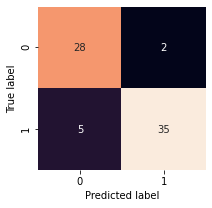

In [40]:
import seaborn as sns 
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes 
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label');

conf_mat=confusion_matrix(Y_test, Y_preds)

plot_conf_mat(conf_mat)

In [41]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
Y_probs = clf.predict_proba(X_test)

# Keep the probabilites of the positive class only
Y_probs = Y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs)

# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.03333333, 0.03333333,
       0.06666667, 0.06666667, 0.1       , 0.1       , 0.2       ,
       0.2       , 0.23333333, 0.23333333, 0.56666667, 0.56666667,
       1.        ])

In [42]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test,Y_probs)

0.965

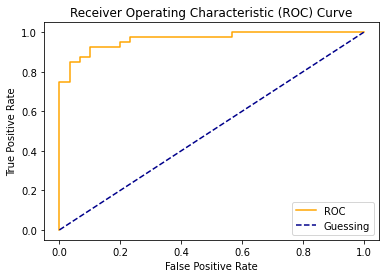

In [43]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)


In [44]:
# calculate the g-mean for each threshold
from numpy import sqrt
gmeans = sqrt(tpr * (1-fpr))

In [45]:
# locate the index of the largest g-mean
from numpy import argmax
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.442958, G-Mean=0.912


In [46]:
import pickle

# save the model to disk
filename = 'classification_model'
pickle.dump(model, open(filename, 'wb'))